<a href="https://colab.research.google.com/github/Aleena24/DL_lab/blob/main/lab2_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# dataset


In [ ]:
df = pd.read_csv('/content/credit_card_fraud.csv')
df.head()

,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,None,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,None,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


In [ ]:
df.describe()

,Transaction Amount,Merchant Category Code (MCC),Transaction Response Code,Fraud Flag or Label
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,2496.356036,5484.150375,5.637500,0.498625
std,1451.221326,2608.164617,4.928147,0.500029
min,1.090000,1000.000000,0.000000,0.000000
25%,1242.580000,3230.750000,0.000000,0.000000
50%,2492.460000,5455.000000,5.000000,0.000000
75%,3739.522500,7761.000000,12.000000,1.000000
max,4996.700000,9999.000000,12.000000,1.000000


# MLP (Multiple Perceptron) model


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

num_features = 6

# Input layer
model.add(Dense(units=64, activation='relu', input_shape=(num_features,)))  # Assuming num_features is the number of input features

# Hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Drop columns not needed for modeling
df.drop(columns=['Cardholder Name', 'Card Number (Hashed or Encrypted)', 'Merchant Name',
                 'Transaction Location (City or ZIP Code)', 'Transaction Currency',
                 'Card Type', 'Card Expiration Date', 'CVV Code (Hashed or Encrypted)',
                 'Transaction Response Code', 'Transaction ID', 'Previous Transactions',
                 'IP Address', 'Device Information', 'User Account Information',
                 'Transaction Notes'], inplace=True)

# Display remaining columns
print("Remaining Columns:")
for column in df.columns:
    print(column)

Remaining Columns:
Transaction Date and Time
Transaction Amount
Merchant Category Code (MCC)
Fraud Flag or Label
Transaction Source


In [ ]:
# Convert 'Transaction Date and Time' to datetime format
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

# Extract relevant numerical features from datetime column
df['Hour'] = df['Transaction Date and Time'].dt.hour
df['Minute'] = df['Transaction Date and Time'].dt.minute
df['Second'] = df['Transaction Date and Time'].dt.second

# Drop original datetime column
df.drop(columns=['Transaction Date and Time'], inplace=True)

In [ ]:
# Convert categorical feature 'Transaction Source' to one-hot encoding
df = pd.get_dummies(df, columns=['Transaction Source'], drop_first=True)

In [ ]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=['Fraud Flag or Label'])
y = df['Fraud Flag or Label']


In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Concatenate training and testing data
X_combined = np.concatenate((X_train, X_test), axis=0)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Split the scaled data back into training and testing sets
X_train_scaled = X_scaled[:len(X_train)]
X_test_scaled = X_scaled[len(X_train):]

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are your preprocessed features and target variables

# Define the model architecture
def create_model(optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Invalid optimizer. Choose 'adam' or 'sgd'.")

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Define hyperparameters to tune
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01, 0.1]

# Train and evaluate the models
best_accuracy = 0
best_hyperparameters = {}

for optimizer in optimizers:
    for lr in learning_rates:
        model = create_model(optimizer=optimizer, learning_rate=lr)
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test)
        print(f"Optimizer: {optimizer}, Learning Rate: {lr}, Test Accuracy: {accuracy}")


        # Update best hyperparameters if accuracy improved
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = {'optimizer': optimizer, 'learning_rate': lr}

print("Best Hyperparameters:", best_hyperparameters)


40/40 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5125
Optimizer: adam, Learning Rate: 0.001, Test Accuracy: 0.512499988079071
40/40 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5086
Optimizer: adam, Learning Rate: 0.01, Test Accuracy: 0.508593738079071
40/40 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5070
Optimizer: adam, Learning Rate: 0.1, Test Accuracy: 0.507031261920929
40/40 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5086
Optimizer: sgd, Learning Rate: 0.001, Test Accuracy: 0.508593738079071
40/40 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5086
Optimizer: sgd, Learning Rate: 0.01, Test Accuracy: 0.508593738079071
40/40 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4992
Optimizer: sgd, Learning Rate: 0.1, Test Accuracy: 0.49921876192092896
Best Hyperparameters: {'optimizer': 'adam', 'learning

# Evaluation and Validation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

40/40 [==============================] - 0s 2ms/step


In [ ]:
threshold = 0.5  # Adjust threshold as needed
y_pred_binary = (y_pred > threshold).astype(int)


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)

acc_per = accuracy * 100
print("Accuracy:", acc_per)

percision_per = precision * 100
print("Precision:", percision_per)

recall_per = recall * 100
print("Recall:", recall_per)

f1_per = f1 * 100
print("F1-score:", f1_per)

Accuracy: 49.921875
Precision: 50.51948051948052
Recall: 59.93836671802774
F1-score: 54.82734319943622


In [ ]:
import matplotlib.pyplot as plt

Confusion Matrix:
[[250 381]
 [260 389]]


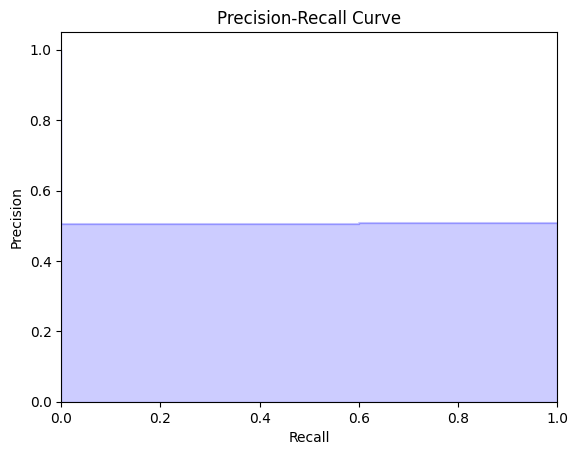

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_binary)
plt.figure()
plt.step(recall_curve, precision_curve, color='b', alpha=0.2, where='post')
plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()